In [265]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn


In [269]:
df2 = pd.read_csv(r"C:\Users\ABHISHEK\Desktop\ANK casecom\Datasetaacs.csv")

In [271]:
df2.head()

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,budget,...,genres,genresIdcreate,genresId,production_companies,production_countries,spoken_languages,directors,writers,averageRating,numVotes
0,27205.0,Inception,8.364,34495.0,Released,15-07-2010,8.255328e+08,148.0,False,160000000.0,...,"Action, Science Fiction, Adventure","""Action, Science Fiction, Adventure"",","[{""id"": 1, ""name"": ""Action""}, {""id"": 4, ""name""...","Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America","English, French, Japanese, Swahili",Christopher Nolan,Christopher Nolan,8.8,2616409.0
1,157336.0,Interstellar,8.417,32571.0,Released,05-11-2014,7.017292e+08,169.0,False,165000000.0,...,"Adventure, Drama, Science Fiction","""Adventure, Drama, Science Fiction"",","[{""id"": 2, ""name"": ""Adventure""}, {""id"": 5, ""na...","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",English,Christopher Nolan,"Jonathan Nolan, Christopher Nolan",8.7,2203559.0
2,155.0,The Dark Knight,8.512,30619.0,Released,16-07-2008,1.004558e+09,152.0,False,185000000.0,...,"Drama, Action, Crime, Thriller","""Drama, Action, Crime, Thriller"",","[{""id"": 5, ""name"": ""Drama""}, {""id"": 1, ""name"":...","DC Comics, Legendary Pictures, Syncopy, Isobel...","United Kingdom, United States of America","English, Mandarin",Christopher Nolan,"Jonathan Nolan, Christopher Nolan, David S. Go...",9.0,2948574.0
3,19995.0,Avatar,7.573,29815.0,Released,15-12-2009,2.923706e+09,162.0,False,237000000.0,...,"Action, Adventure, Fantasy, Science Fiction","""Action, Adventure, Fantasy, Science Fiction"",","[{""id"": 1, ""name"": ""Action""}, {""id"": 2, ""name""...","Dune Entertainment, Lightstorm Entertainment, ...","United States of America, United Kingdom","English, Spanish",James Cameron,James Cameron,7.9,1409608.0
4,24428.0,The Avengers,7.710,29166.0,Released,25-04-2012,1.518816e+09,143.0,False,220000000.0,...,"Science Fiction, Action, Adventure","""Science Fiction, Action, Adventure"",","[{""id"": 4, ""name"": ""Science Fiction""}, {""id"": ...",Marvel Studios,United States of America,"English, Hindi, Russian",Joss Whedon,"Joss Whedon, Zak Penn",8.0,1484397.0


In [273]:
C= df2['vote_average'].mean()
C

6.755584799999999

In [275]:
m= df2['vote_count'].quantile(0.9)
m

7000.300000000005

In [277]:
q_movies = df2.copy().loc[df2['vote_count'] >= m]
q_movies.shape

(500, 25)

In [279]:
def weighted_rating(x, m=m, C=C):
    v = x['vote_count']
    R = x['vote_average']
    # Calculation based on the IMDB formula
    return (v/(v+m) * R) + (m/(m+v) * C)

In [281]:
q_movies['score'] = q_movies.apply(weighted_rating, axis=1)

In [283]:
#Sort movies based on score calculated above
q_movies = q_movies.sort_values('score', ascending=False)

#Print the top 15 movies
q_movies[['title', 'vote_count', 'vote_average', 'score']].head(10)

,title,vote_count,vote_average,score
14,The Shawshank Redemption,24649.0,8.702,8.271485
2,The Dark Knight,30619.0,8.512,8.185162
53,The Godfather,18677.0,8.707,8.174993
1,Interstellar,32571.0,8.417,8.123090
9,Pulp Fiction,25893.0,8.488,8.119310
10,Forrest Gump,25409.0,8.477,8.105180
7,Fight Club,27238.0,8.438,8.094016
0,Inception,34495.0,8.364,8.092659
20,The Lord of the Rings: The Return of the King,22334.0,8.474,8.063920
19,The Lord of the Rings: The Fellowship of the Ring,23323.0,8.402,8.021916


Text(0.5, 1.0, 'Popular Movies')

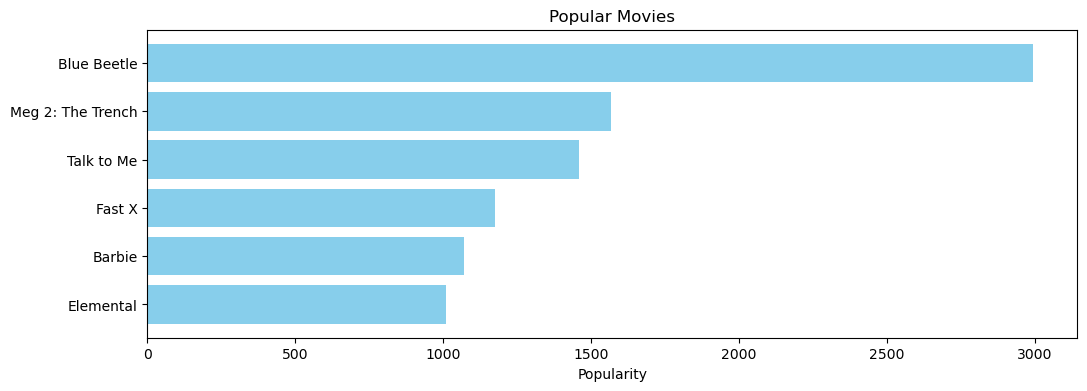

In [285]:
pop= df2.sort_values('popularity', ascending=False)
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))

plt.barh(pop['title'].head(6),pop['popularity'].head(6), align='center',
        color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel("Popularity")
plt.title("Popular Movies")

In [287]:
#Import TfIdfVectorizer from scikit-learn
from sklearn.feature_extraction.text import TfidfVectorizer

#Define a TF-IDF Vectorizer Object. Remove all english stop words such as 'the', 'a'
tfidf = TfidfVectorizer(stop_words='english')

#Replace NaN with an empty string
df2['overview'] = df2['overview'].fillna('')

#Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(df2['overview'])

#Output the shape of tfidf_matrix
tfidf_matrix.shape

(26419, 19735)

In [289]:
# Import linear_kernel
from sklearn.metrics.pairwise import linear_kernel

# Compute the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [291]:
#Construct a reverse map of indices and movie titles
indices = pd.Series(df2.index, index=df2['title']).drop_duplicates()

In [293]:
# Function that takes in movie title as input and outputs most similar movies
def get_recommendations(title, cosine_sim=cosine_sim):
    # Get the index of the movie that matches the title
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return df2['title'].iloc[movie_indices]

In [295]:
get_recommendations('The Dark Knight Rises')

2                               The Dark Knight
3978                        Justice League Dark
366                                  The Batman
879                              Batman Forever
2876    Batman: The Dark Knight Returns, Part 1
912                              Batman & Robin
3850         Batman Beyond: Return of the Joker
2867                 Batman: Under the Red Hood
4550                          Batman: Bad Blood
4698                               Batman: Hush
Name: title, dtype: object

In [301]:
from ast import literal_eval

features = ['genresId']
for feature in features:
    df2[feature] = df2[feature].apply(lambda x: literal_eval(x) if isinstance(x, str) else [])


In [359]:
# Print the new features of the first 3 films
df2[['title','genresId']].head(10)

,title,genresId
0,Inception,"[{'id': 1, 'name': 'Action'}, {'id': 4, 'name'..."
1,Interstellar,"[{'id': 2, 'name': 'Adventure'}, {'id': 5, 'na..."
2,The Dark Knight,"[{'id': 5, 'name': 'Drama'}, {'id': 1, 'name':..."
3,Avatar,"[{'id': 1, 'name': 'Action'}, {'id': 2, 'name'..."
4,The Avengers,"[{'id': 4, 'name': 'Science Fiction'}, {'id': ..."
5,Deadpool,"[{'id': 1, 'name': 'Action'}, {'id': 2, 'name'..."
6,Avengers: Infinity War,"[{'id': 2, 'name': 'Adventure'}, {'id': 1, 'na..."
7,Fight Club,"[{'id': 5, 'name': 'Drama'}]"
8,Guardians of the Galaxy,"[{'id': 1, 'name': 'Action'}, {'id': 4, 'name'..."
9,Pulp Fiction,"[{'id': 7, 'name': 'Thriller'}, {'id': 6, 'nam..."


In [307]:
def get_director(x):
    for i in x:
        if i['job'] == 'Director':
            return i['name']
    return np.nan

In [309]:
def get_list(x):
    if isinstance(x, list):
        names = [i['name'] for i in x]
        #Check if more than 3 elements exist. If yes, return only first three. If no, return entire list.
        if len(names) > 3:
            names = names[:3]
        return names

    #Return empty list in case of missing/malformed data
    return []

In [233]:
# Define new director, cast, genres and keywords features that are in a suitable form.
#df2['director'] = df2['crew'].apply(get_director)

features = ['genres']
for feature in features:
    df2[feature] = df2[feature].apply(get_list)

In [435]:
# Print the new features of the first 3 films
df2[['title','directors','genresId']].head(10)

,title,directors,genresId
0,Inception,Christopher Nolan,[]
1,Interstellar,Christopher Nolan,[]
2,The Dark Knight,Christopher Nolan,[]
3,Avatar,James Cameron,[]
4,The Avengers,Joss Whedon,[]
5,Deadpool,Tim Miller,[]
6,Avengers: Infinity War,"Anthony Russo, Joe Russo",[]
7,Fight Club,David Fincher,[]
8,Guardians of the Galaxy,James Gunn,[]
9,Pulp Fiction,Quentin Tarantino,[]


In [313]:
def clean_data(x):
    if isinstance(x, list):
        return [str.lower(i.replace(" ", "")) for i in x]
    else:
        #Check if director exists. If not, return empty string
        if isinstance(x, str):
            return str.lower(x.replace(" ", ""))
        else:
            return ''

In [317]:
# Apply clean_data function to your features.
features = ['genres']

for feature in features:
    df2[feature] = df2[feature].apply(clean_data)

In [319]:
def create_soup(x):
  return (x['genres'])
df2['soup'] = df2.apply(create_soup, axis=1)

In [321]:
from sklearn.feature_extraction.text import CountVectorizer

count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(df2['soup'])

In [329]:
# Compute the Cosine Similarity matrix based on the count_matrix
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim2 = cosine_similarity(count_matrix, count_matrix)

In [331]:
# Reset index of our main DataFrame and construct reverse mapping as before
df2 = df2.reset_index()
indices = pd.Series(df2.index, index=df2['title'])

In [333]:
get_recommendations('The Dark Knight Rises', cosine_sim2)

25                      The Dark Knight Rises
535                            Fast & Furious
565                              Jack Reacher
606     The Fast and the Furious: Tokyo Drift
944           El Camino: A Breaking Bad Movie
1055                           Need for Speed
1146                           Gangster Squad
1857                               Colombiana
1859                               Death Wish
2231                               Contraband
Name: title, dtype: object

In [335]:
!pip install scikit-surprise
from surprise import Reader, Dataset, SVD
# read in values as Surprise dataset
reader = Reader()
#data = Dataset.load_from_df(new_df, reader)

In [343]:
data = Dataset.load_from_df(df2[['id', 'title', 'averageRating']], reader)
#data.split(n_folds=5)

In [339]:
svd = SVD()
evaluate(svd, data, measures=['RMSE', 'MAE'], cv=5)

NameError: name 'evaluate' is not defined

In [345]:
from surprise.model_selection import cross_validate

In [347]:
model=SVD()
cross_validate(model, data, measures=['rmse', 'mae'], cv=5)

{'test_rmse': array([nan, nan, nan, nan, nan]),
 'test_mae': array([nan, nan, nan, nan, nan]),
 'fit_time': (0.28414011001586914,
  0.21296477317810059,
  0.24068474769592285,
  0.22263717651367188,
  0.2422330379486084),
 'test_time': (0.015931367874145508,
  0.01606917381286621,
  0.015761613845825195,
  0.023319005966186523,
  0.024939775466918945)}

In [348]:
trainset = data.build_full_trainset()
model.fit(trainset)

In [349]:
df2[df2['id'] == 456740]

,level_0,index,id,title,vote_average,vote_count,status,release_date,revenue,runtime,...,genresIdcreate,genresId,production_companies,production_countries,spoken_languages,directors,writers,averageRating,numVotes,soup
1436,1436,1436,456740.0,Hellboy,5.554,3119.0,Released,10-04-2019,55065289.0,121.0,...,"""Fantasy, Horror, Action, Adventure"",","[{'id': 3, 'name': 'Fantasy'}, {'id': 14, 'nam...","Campbell Grobman Films, Dark Horse Entertainme...","Bulgaria, Canada, France, Portugal, United Sta...","German, English, Russian, Turkish",Neil Marshall,"Andrew Cosby, Mike Mignola",5.3,102780.0,"fantasy,horror,action,adventure"


In [355]:
model.predict(456740, "Hellboy", 5.3)

Prediction(uid=456740, iid='Hellboy', r_ui=5.3, est=5, details={'was_impossible': False})